# Necessary libraries

In [146]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [126]:
# Load the dataset
data = pd.read_csv('/Users/mac/Downloads/archive-5/batsman data odi.csv')


In [127]:
# Display the first 5 rows of data
print(data.head())

# Display the last 5 rows of data
print(data.tail())

# Display the shape of the dataset
print(data.shape)

# Display the information about the dataset
print(data.info())

# Display the summary statistics of the dataset
print(data.describe())




      Player Name    Country Time Period  Matches  Played  Not Outs  Runs  \
0  ST Jayasuriya   Sri Lanka   1990-2008       25      24         1  1220   
1  KC Sangakkara   Sri Lanka   2004-2014       24      23         1  1075   
2   SR Tendulkar       India   1990-2012       23      21         2   971   
3   Shoaib Malik    Pakistan   2000-2018       17      15         3   786   
4      RG Sharma       India   2008-2018       22      21         5   745   

   Highest Score  Batting Average  Balls Faced  Strike Rate  Centuries  \
0            130            53.04         1190       102.52          6   
1            121            48.86         1272        84.51          4   
2            114            51.10         1136        85.47          2   
3            143            65.50          867        90.65          3   
4            111            46.56          877        84.94          1   

   Fifties  Ducks  Fours  Sixes  
0        3      1    139     23  
1        8      2    107

In [128]:
# Select the relevant columns
relevant_cols = ['Strike Rate', 'Batting Average', 'Runs', 'Played']

# Calculate the correlation matrix
corr_matrix = data[relevant_cols].corr()

# print the correlation
print(corr_matrix)

                 Strike Rate  Batting Average      Runs    Played
Strike Rate         1.000000         0.151286  0.359477  0.262481
Batting Average     0.151286         1.000000 -0.016498 -0.342138
Runs                0.359477        -0.016498  1.000000  0.750308
Played              0.262481        -0.342138  0.750308  1.000000


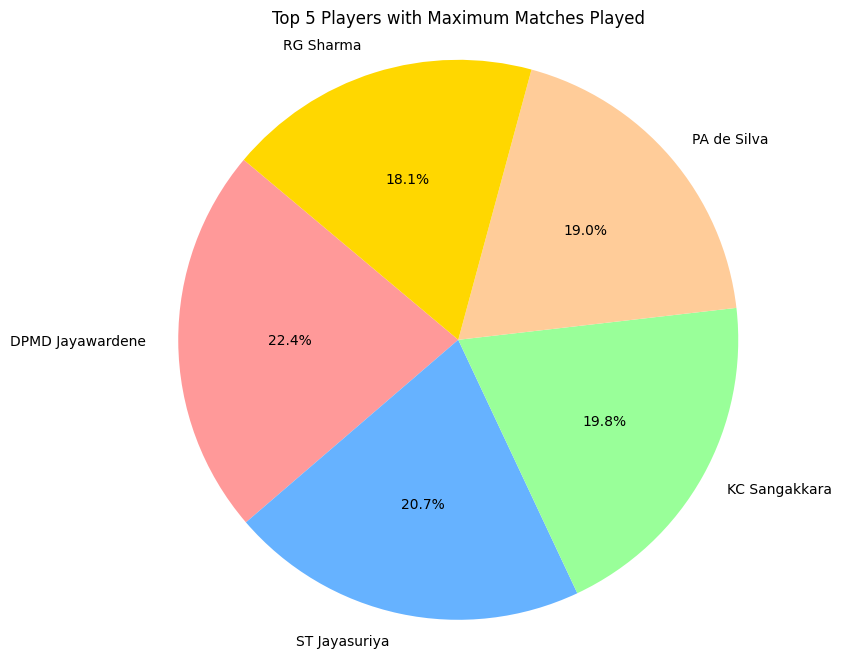

In [129]:

# Sort the dataframe by number of matches played in descending order and select the top 5 players
top_players = data.sort_values(by='Played', ascending=False).head()

# Define a custom color palette for the pie chart
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']  # Example custom color palette

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_players['Played'], labels=top_players['Player Name'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Top 5 Players with Maximum Matches Played')
plt.show()


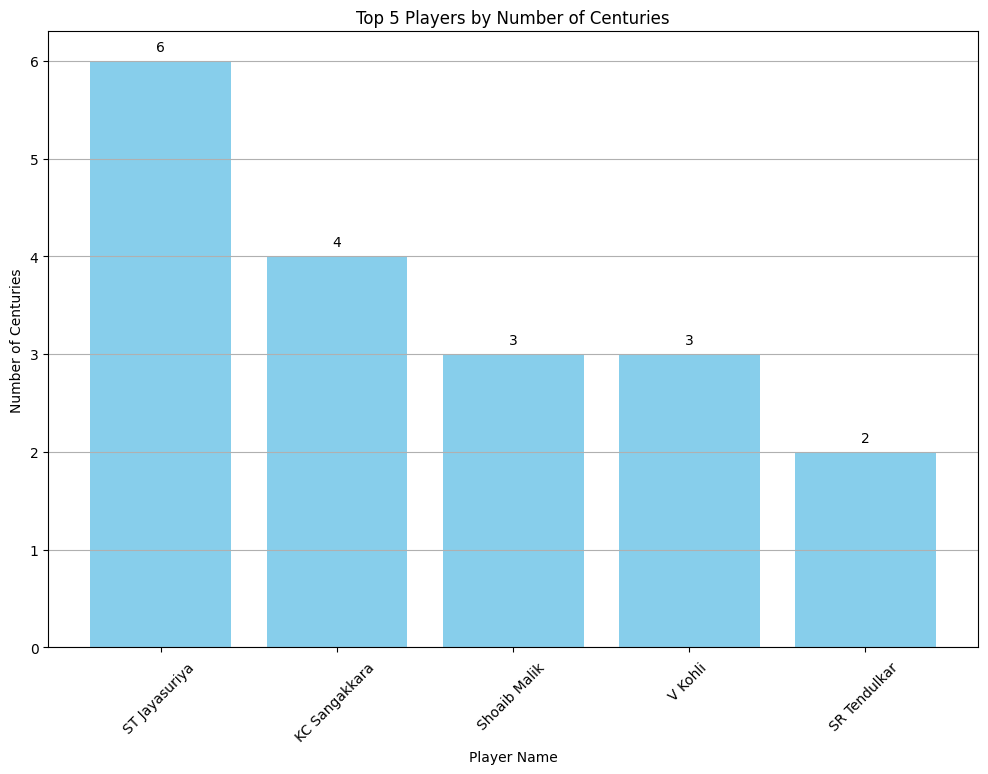

In [130]:
def plot_top_players_centuries_bar_chart(data):
    # Sort the dataframe by number of centuries in descending order and select the top 5 players
    top_players = data.sort_values(by='Centuries', ascending=False).head()

    # Create the bar chart
    plt.figure(figsize=(12, 8))
    plt.bar(top_players['Player Name'], top_players['Centuries'], color='skyblue')
    plt.xlabel('Player Name')
    plt.ylabel('Number of Centuries')
    plt.title('Top 5 Players by Number of Centuries')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Display the player names on top of the bars
    for i, value in enumerate(top_players['Centuries']):
        plt.text(i, value + 0.1, str(value), ha='center')

    plt.show()



plot_top_players_centuries_bar_chart(data)

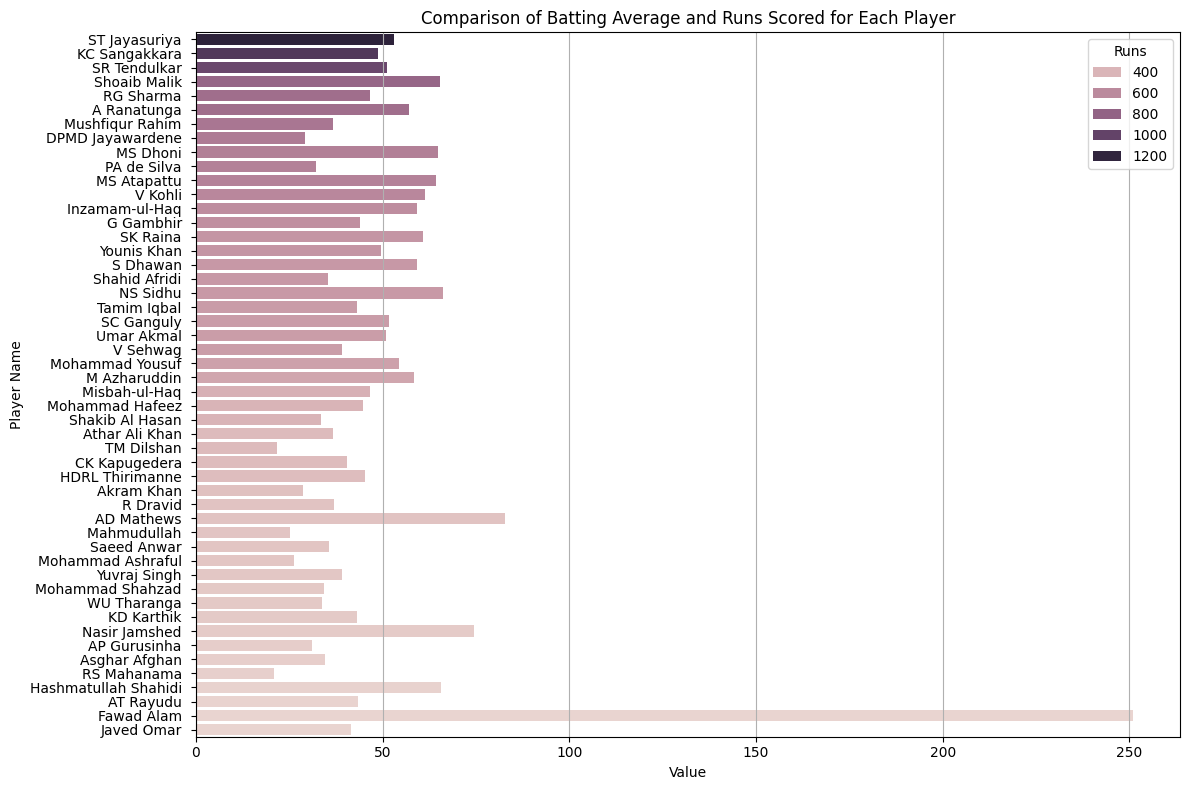

In [131]:
# Batting Average vs Runs Scored (Bar Plot with Adjusted Y-Axis Label Position)
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='Batting Average', y='Player Name', hue='Runs')
plt.title('Comparison of Batting Average and Runs Scored for Each Player')
plt.xlabel('Value')
plt.ylabel('Player Name')
plt.legend(title='Runs', bbox_to_anchor=(1, 1))
plt.grid(axis='x')
plt.tight_layout()  # Adjust layout to prevent overlap

# Adjust position of y-axis labels
plt.yticks(ticks=np.arange(len(data['Player Name'])), labels=data['Player Name'], ha='right')

plt.show()

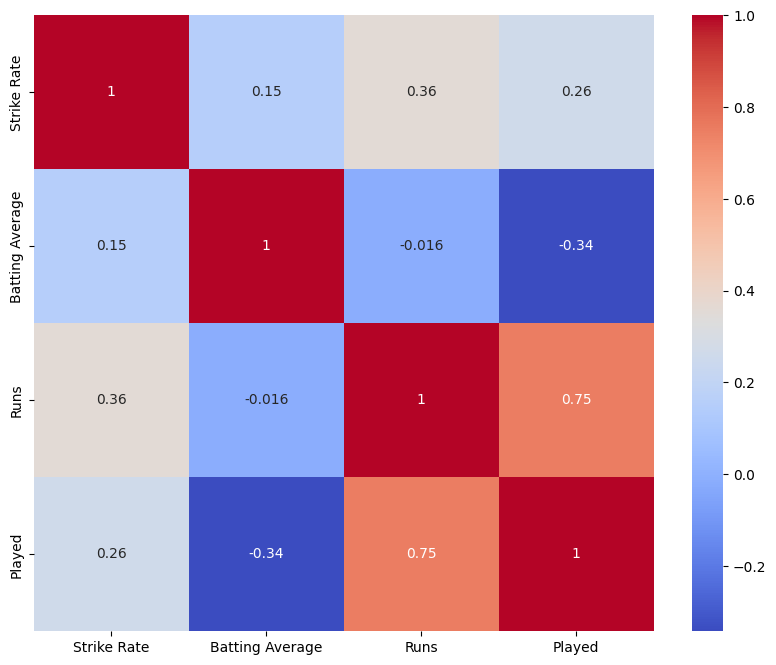

In [132]:
def plot_heatmap(data):
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, cmap='coolwarm')
    plt.show()
# Assuming 'corr_matrix' is the variable containing the correlation matrix data

plot_heatmap(corr_matrix)

In [133]:
df = pd.read_csv('/Users/mac/Downloads/archive-5/batsman data odi.csv').dropna()
df = df.set_index('Player Name')
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

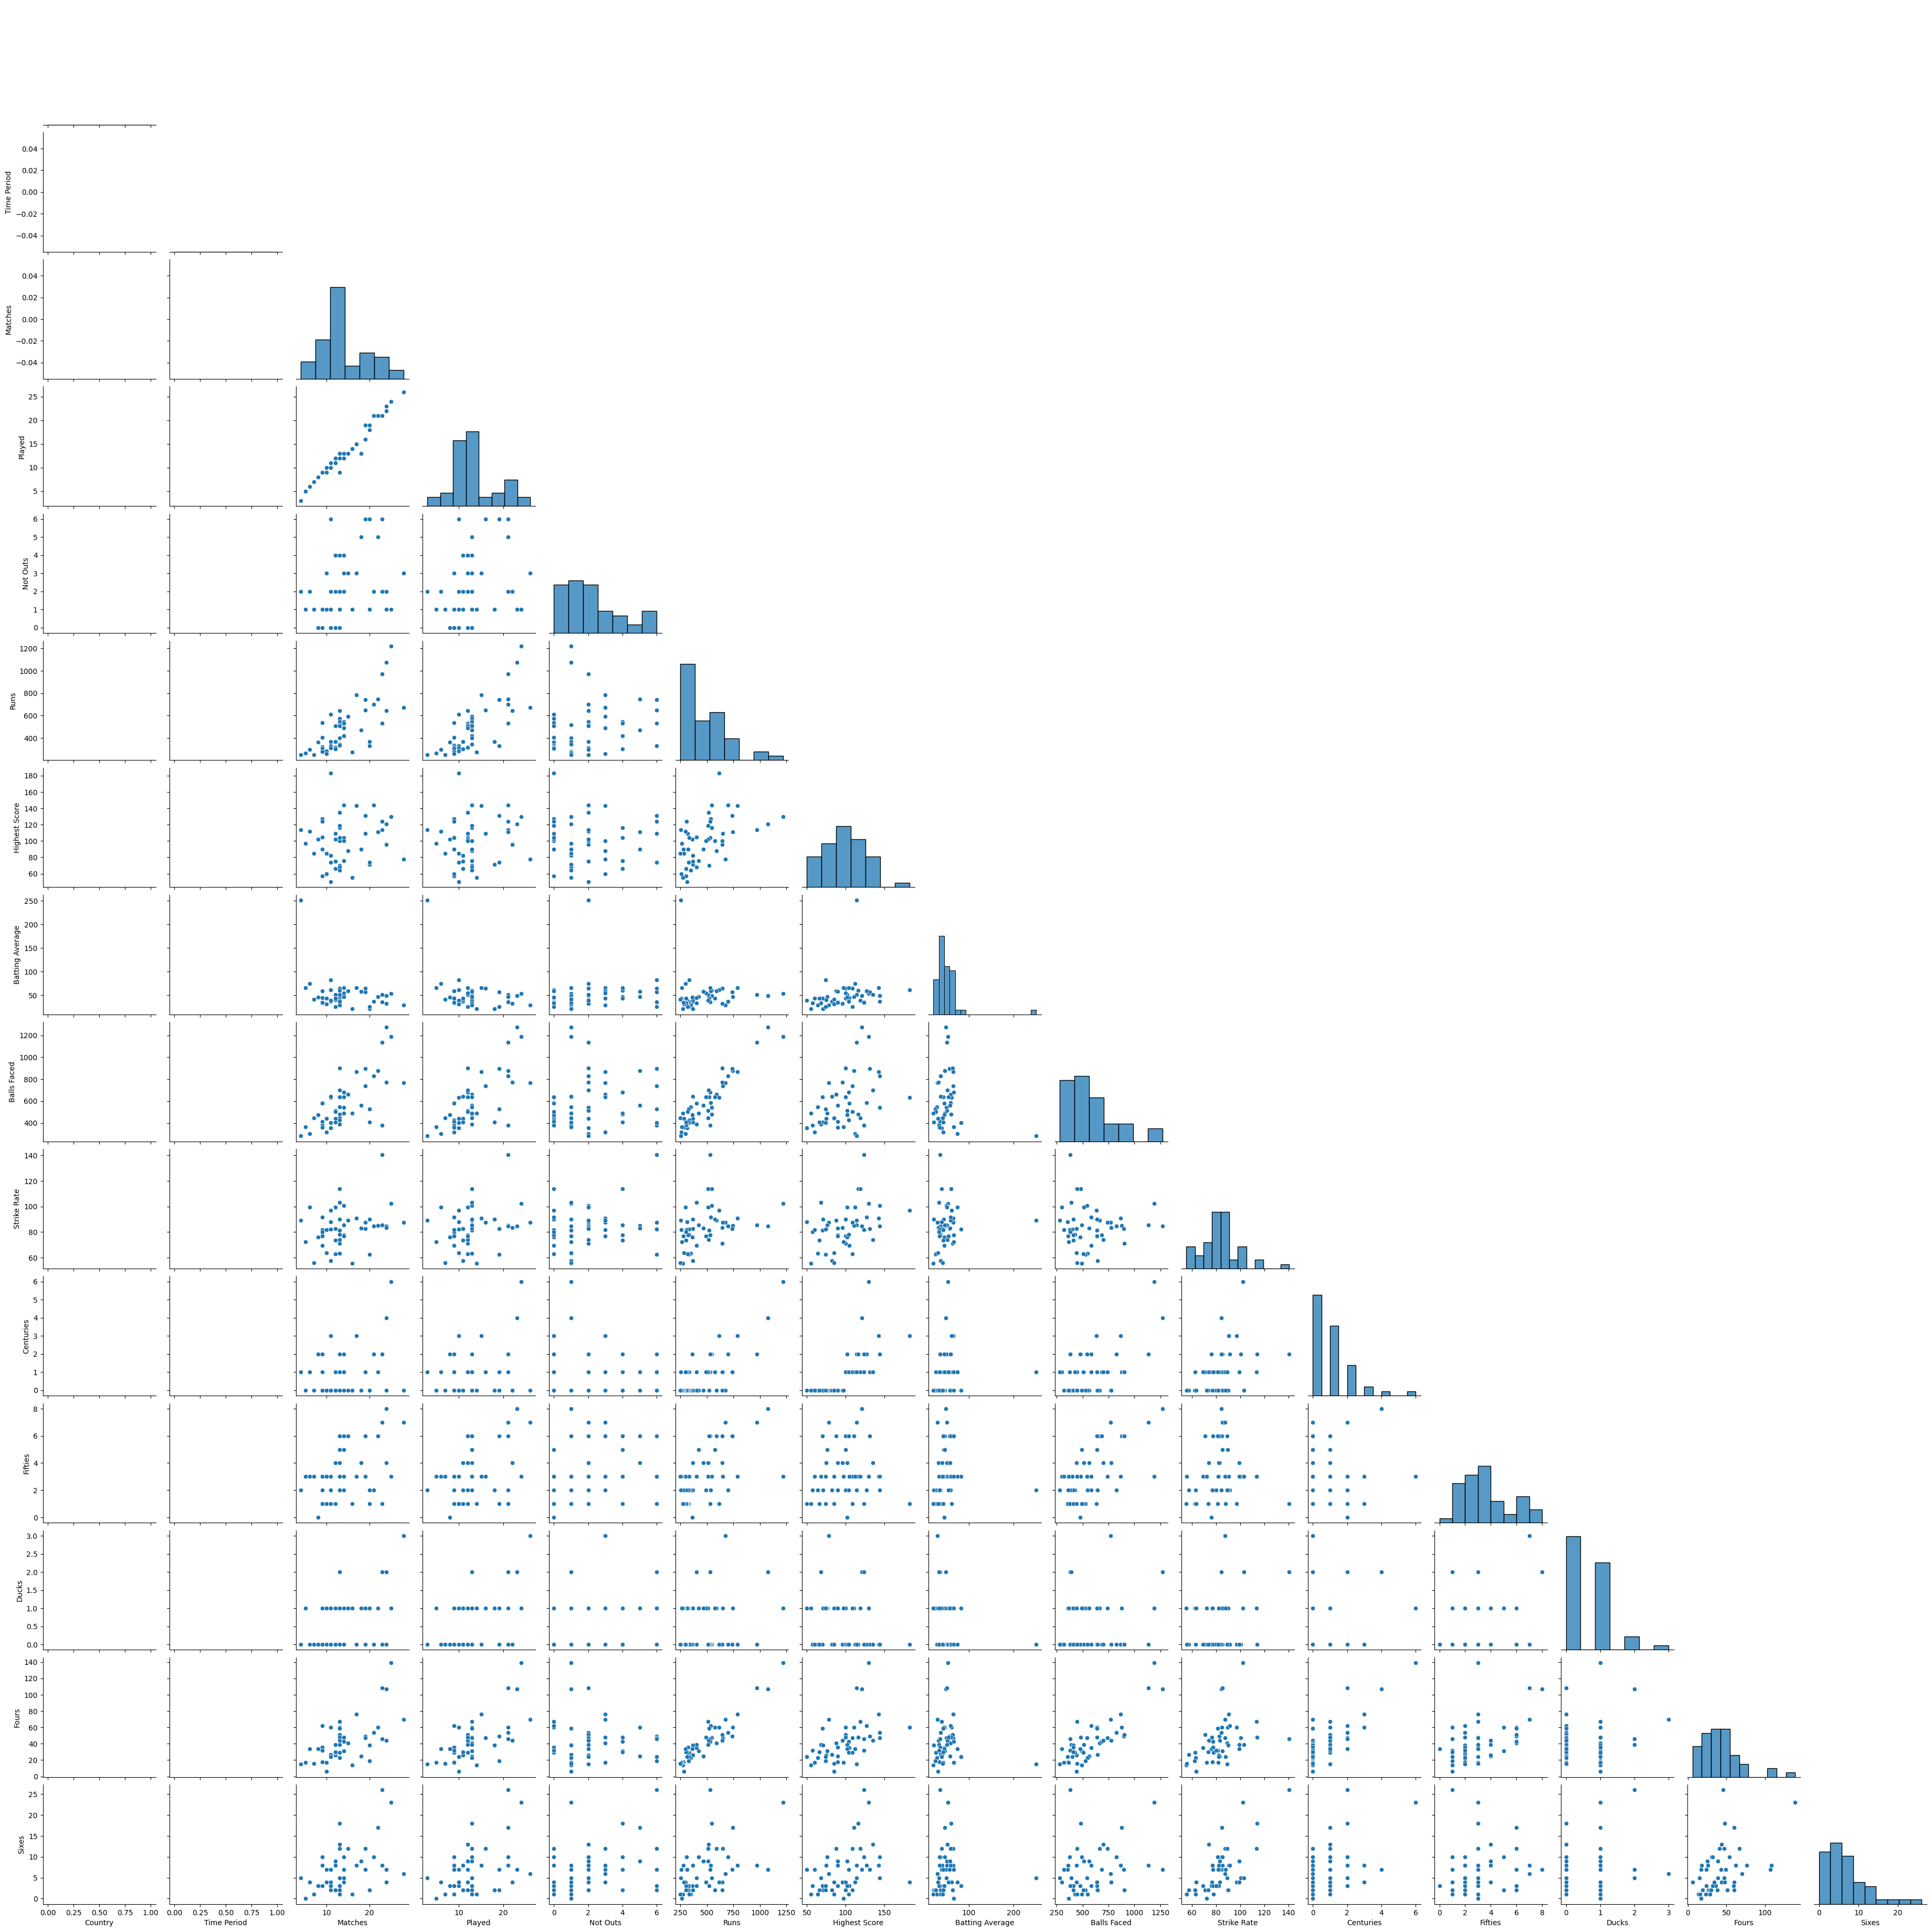

In [134]:
sns.pairplot(df, corner=True)
plt.show()

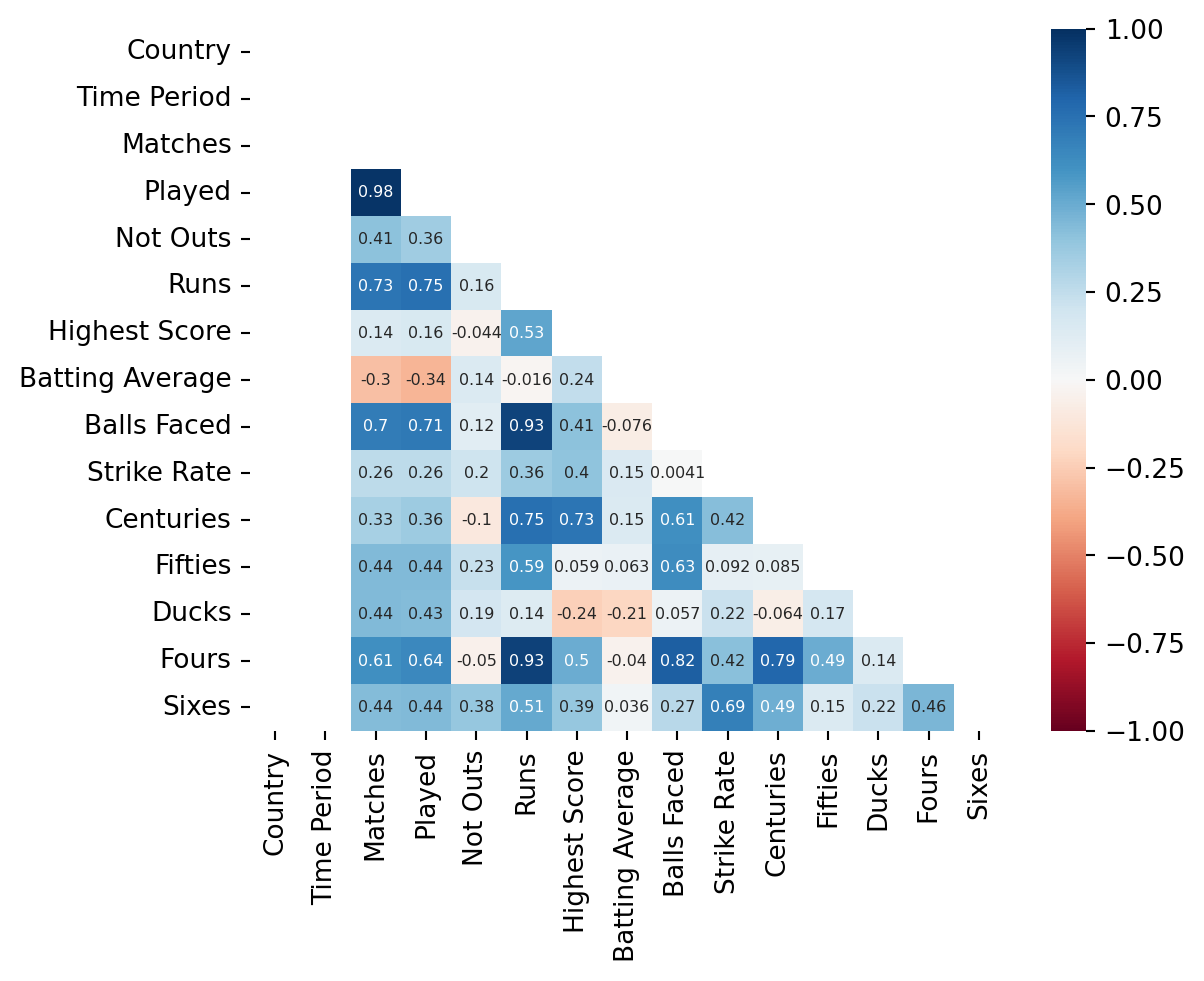

In [135]:
fig, ax = plt.subplots(dpi=190)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask, annot_kws={'size': 6})
plt.show()

In [136]:
from sklearn.preprocessing import MinMaxScaler
df_cut = data[['Runs', 'Strike Rate']].copy()
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_cut)
inv_norm = scaler.inverse_transform(norm)

In [137]:
def one_silhoutte_inertia(n, xy):
    """ 
    Calculates the silhoutte score and WCSS for n clusters 
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [138]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    fig, ax = plt.subplots(dpi=144)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    ax.set_xlabel('k')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.show()
    return

 2 clusters silhoutte score = 0.44
 3 clusters silhoutte score = 0.44
 4 clusters silhoutte score = 0.45
 5 clusters silhoutte score = 0.44
 6 clusters silhoutte score = 0.44
 7 clusters silhoutte score = 0.45
 8 clusters silhoutte score = 0.42
 9 clusters silhoutte score = 0.46
10 clusters silhoutte score = 0.44
Best number of clusters =  9


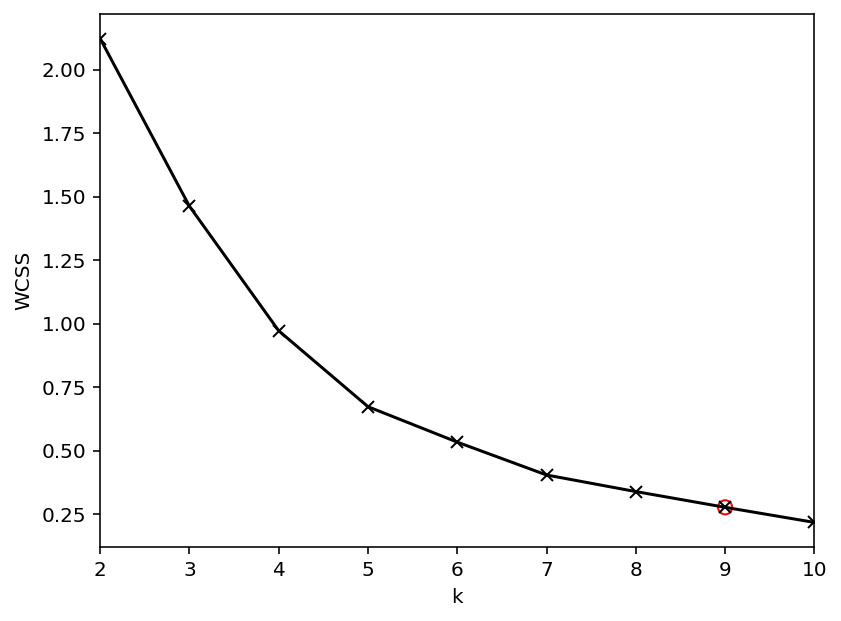

In [139]:
wcss = []
best_n, best_score = None, -np.inf
for n in range(2, 11):  # 2 to 10 clusters
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

print(f"Best number of clusters = {best_n:2g}")
plot_elbow_method(2, 10, wcss, best_n)

In [140]:
def plot_fitted_runs_strike_rate(labels, xy, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi=144)
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o', label='Data')

    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap, marker='x', s=100, label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('Runs')
    ax.set_ylabel('Strike Rate')
    plt.show()
    return

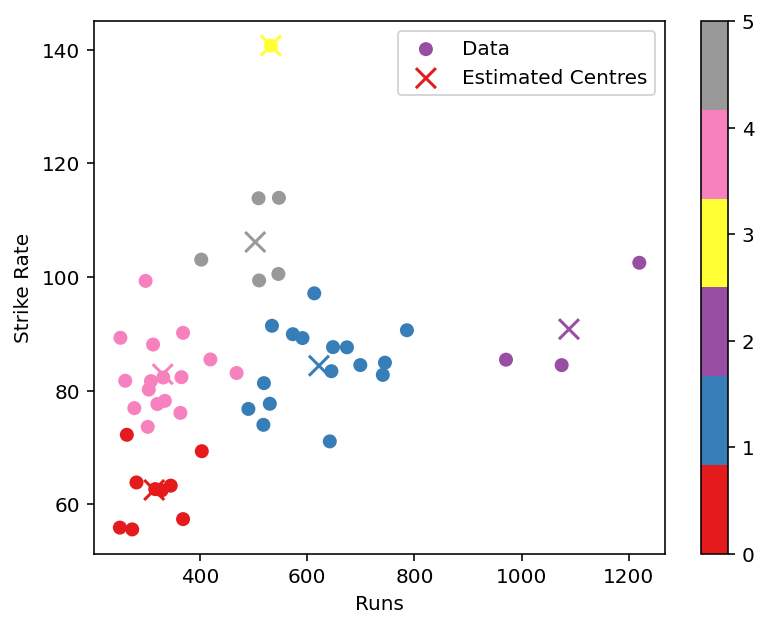

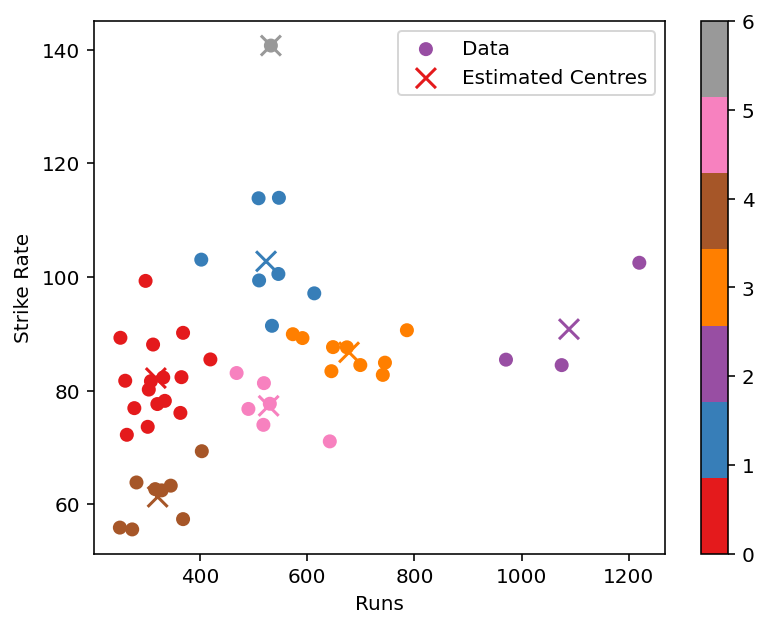

In [141]:
for k in range(6, 8):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     # fit done on x,y pairs
    labels = kmeans.labels_
    
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plot_fitted_runs_strike_rate(labels, inv_norm, xkmeans, ykmeans, cenlabels)

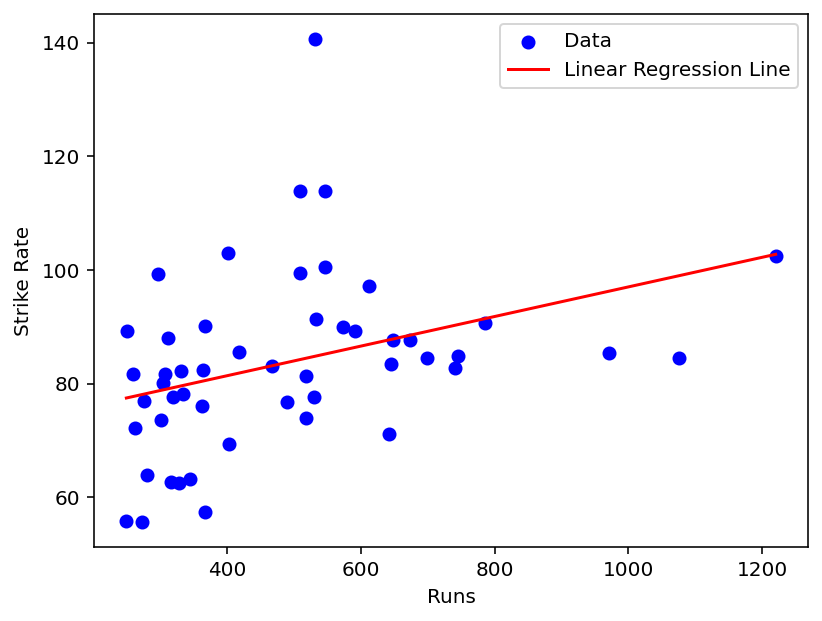

In [147]:
# Fit a linear regression model to all data points
lr = LinearRegression()
lr.fit(inv_norm[:, 0].reshape(-1, 1), inv_norm[:, 1])  # Fit on Strike Rate and Runs

# Plot the linear regression line
x_range = np.linspace(inv_norm[:, 0].min(), inv_norm[:, 0].max(), 100).reshape(-1, 1)
y_pred = lr.predict(x_range)

# Scatter plot of all data points
plt.figure(dpi=144)
plt.scatter(inv_norm[:, 0], inv_norm[:, 1], label='Data', color='b')
plt.plot(x_range, y_pred, color='r', label='Linear Regression Line')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.legend()
plt.show()